In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
info_pedidos_df = pd.read_csv('Info_de_Pedidos_15_08_24.csv', encoding='cp1252', sep =';', decimal=',')
display(info_pedidos_df)

,,Pedido Id,Id Entrega,Data/Hora,Data Marketplace,Data Aprovação,Id Cliente,Situação,Situação - Transporte,Marketplace,...,Valor Produto,Valor Desconto,Valor Frete,Valor Frete Transportadora,Valor Total,Valor Total Pedido,Motivo Cancelamento,Origem - Source,Origem - Referência (site),Origem - Dispositivo
0,aguardando-pagamento,669,668,15/08/2024 11:42,15/08/2024 11:31,NaN,790,1 - Aguardando Pagamento,Não Enviado,41 - Shopee,...,129.80,31.00,28.30,25.00,98.80,98.80,NaN,NaN,NaN,NaN
1,aguardando-pagamento,668,667,15/08/2024 10:42,15/08/2024 10:41,NaN,789,1 - Aguardando Pagamento,Não Enviado,41 - Shopee,...,71.90,17.00,5.48,25.00,54.90,54.90,NaN,NaN,NaN,NaN
2,transporte,667,666,15/08/2024 07:33,NaN,15/08/2024 07:34,788,7 - Transporte,Não Enviado,NaN,...,19.70,0.00,10.51,10.51,30.21,30.21,NaN,adwords,https-www-google-com,Mobile
3,transporte,666,665,15/08/2024 00:14,NaN,15/08/2024 00:15,787,7 - Transporte,Não Enviado,NaN,...,56.70,0.00,17.30,17.30,74.00,74.00,NaN,adwords,https-www-google-com-br,Mobile
4,aguardando-pagamento,665,664,14/08/2024 23:02,14/08/2024 22:42,NaN,786,1 - Aguardando Pagamento,Não Enviado,41 - Shopee,...,46.90,2.00,5.48,25.00,44.90,44.90,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,pagamento-cancelado,16,16,05/05/2024 23:51,NaN,NaN,123,2 - Cancelado Pagamento,Não Enviado,NaN,...,41.12,2.06,10.11,10.11,49.17,49.17,NaN,ig,http-instagram-com,Mobile
649,pagamento-cancelado,15,15,03/05/2024 12:03,NaN,NaN,122,2 - Cancelado Pagamento,Não Enviado,NaN,...,48.06,2.40,8.97,8.97,54.63,54.63,NaN,ig,https-l-instagram-com,Mobile
650,entregue,14,14,03/05/2024 11:21,NaN,03/05/2024 11:33,120,8 - Entregue,Entregue,NaN,...,33.96,1.68,9.06,9.06,41.34,41.34,NaN,NaN,NaN,Desktop
651,entregue,13,13,02/05/2024 22:54,NaN,02/05/2024 22:55,119,8 - Entregue,Entregue,NaN,...,89.80,0.00,10.68,10.68,100.48,100.48,NaN,ig,http-instagram-com,Mobile


In [2]:
def graficos(df, coluna, minimo, maximo):
    df = (df.where(df[coluna] <= maximo)).dropna()
    df = (df.where(df[coluna] > minimo)).dropna()
    display(df['Situação'].value_counts())
    df['Situação'].value_counts().plot(kind='pie', shadow=True, autopct='%.1f%%')
    plt.title(f'{coluna} entre {minimo} e {maximo}')
    plt.ylabel('')
    plt.show()
    return

In [3]:
info_pedidos_df = info_pedidos_df[['Situação', 'Valor Produto', 'Valor Desconto', 'Valor Frete', 'Valor Total']] 
display(info_pedidos_df)

,Situação,Valor Produto,Valor Desconto,Valor Frete,Valor Total
0,1 - Aguardando Pagamento,129.80,31.00,28.30,98.80
1,1 - Aguardando Pagamento,71.90,17.00,5.48,54.90
2,7 - Transporte,19.70,0.00,10.51,30.21
3,7 - Transporte,56.70,0.00,17.30,74.00
4,1 - Aguardando Pagamento,46.90,2.00,5.48,44.90
...,...,...,...,...,...
648,2 - Cancelado Pagamento,41.12,2.06,10.11,49.17
649,2 - Cancelado Pagamento,48.06,2.40,8.97,54.63
650,8 - Entregue,33.96,1.68,9.06,41.34
651,8 - Entregue,89.80,0.00,10.68,100.48


In [4]:
display(info_pedidos_df['Situação'].value_counts())

Situação
8 - Entregue                  279
7 - Transporte                194
2 - Cancelado Pagamento       173
1 - Aguardando Pagamento        6
26 - Nota Fiscal Cancelada      1
Name: count, dtype: int64

In [5]:
info_pedidos_df = info_pedidos_df[info_pedidos_df['Situação'] != '1 - Aguardando Pagamento']
info_pedidos_df = info_pedidos_df[info_pedidos_df['Situação'] != '26 - Nota Fiscal Cancelada']

info_pedidos_df['Valor Pedido'] = info_pedidos_df['Valor Produto'] - info_pedidos_df['Valor Desconto']
info_pedidos_df = info_pedidos_df.drop(['Valor Desconto'], axis=1)
info_pedidos_df = info_pedidos_df.drop(['Valor Produto'], axis=1)

info_pedidos_df['Valor Total'] = info_pedidos_df['Valor Pedido'] + info_pedidos_df['Valor Frete']

info_pedidos_df['Percentual Frete'] = info_pedidos_df['Valor Frete'] / info_pedidos_df['Valor Total'] * 100
info_pedidos_df['Percentual Frete'] = info_pedidos_df['Percentual Frete'].round(1)

info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = '2 - Cancelado Pagamento', value = 'Cancelada')
info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = '8 - Entregue', value = 'Concluida')
info_pedidos_df['Situação'] = info_pedidos_df['Situação'].replace(to_replace = '7 - Transporte', value = 'Concluida')

info_pedidos_df = info_pedidos_df[['Situação', 'Valor Pedido', 'Valor Frete', 'Valor Total', 'Percentual Frete']]

display(info_pedidos_df['Situação'].value_counts())
display(info_pedidos_df)

Situação
Concluida    473
Cancelada    173
Name: count, dtype: int64

,Situação,Valor Pedido,Valor Frete,Valor Total,Percentual Frete
2,Concluida,19.70,10.51,30.21,34.8
3,Concluida,56.70,17.30,74.00,23.4
7,Concluida,24.90,0.00,24.90,0.0
8,Concluida,20.80,2.99,23.79,12.6
9,Concluida,53.80,16.07,69.87,23.0
...,...,...,...,...,...
648,Cancelada,39.06,10.11,49.17,20.6
649,Cancelada,45.66,8.97,54.63,16.4
650,Concluida,32.28,9.06,41.34,21.9
651,Concluida,89.80,10.68,100.48,10.6


Situação
Concluida    473
Cancelada    173
Name: count, dtype: int64

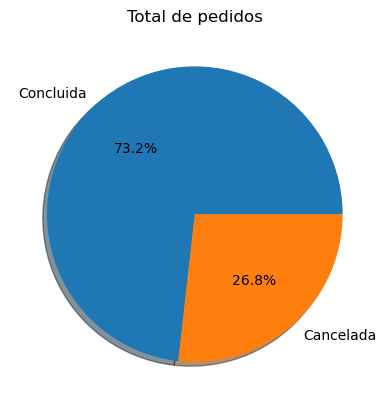

In [6]:
display(info_pedidos_df['Situação'].value_counts())
info_pedidos_df['Situação'].value_counts().plot(kind='pie', shadow=True, autopct='%.1f%%')
plt.title('Total de pedidos')
plt.ylabel('')
plt.show()

In [7]:
medias_pedidos = info_pedidos_df.groupby('Situação').mean()
medias_pedidos = medias_pedidos.round(1)
display(medias_pedidos)
medias_pedidos = medias_pedidos.drop(['Percentual Frete'], axis=1)
medias_pedidos = medias_pedidos.drop(['Valor Total'], axis=1)

print('Média do valor do frete nos pedidos {:.2F} R$ '.format(info_pedidos_df['Valor Frete'].mean()))
print('Média do percentual do frete no valor total {:.2F} R$ '.format(info_pedidos_df['Percentual Frete'].mean()))


,Valor Pedido,Valor Frete,Valor Total,Percentual Frete
Situação,,,,
Cancelada,34.7,18.5,53.2,36.2
Concluida,41.3,11.9,53.2,25.1


Média do valor do frete nos pedidos 13.67 R$ 
Média do percentual do frete no valor total 28.08 R$ 


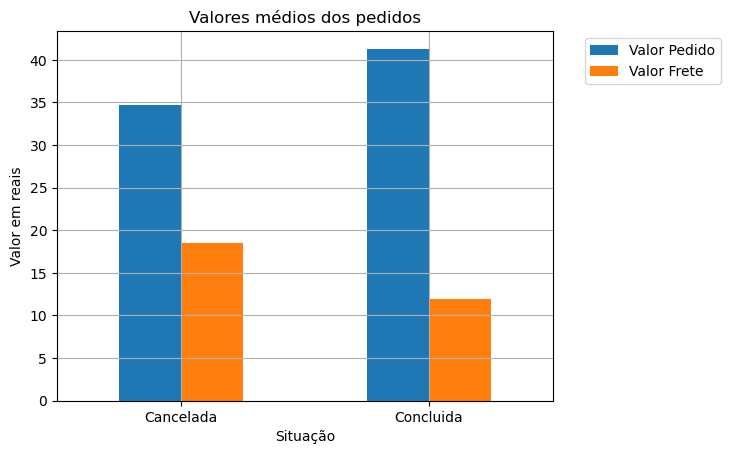

In [8]:
medias_pedidos.plot(kind='bar')
plt.title('Valores médios dos pedidos')
plt.xticks(rotation = 0)
plt.ylabel('Valor em reais')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Situação
Concluida    275
Cancelada     64
Name: count, dtype: int64

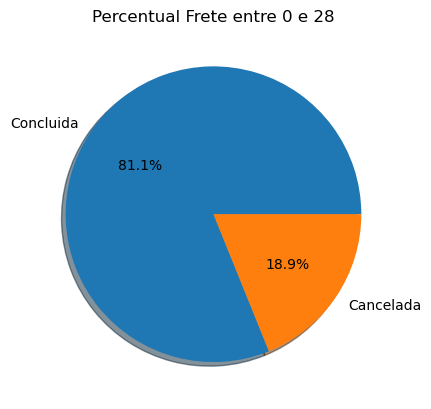

Situação
Concluida    166
Cancelada     95
Name: count, dtype: int64

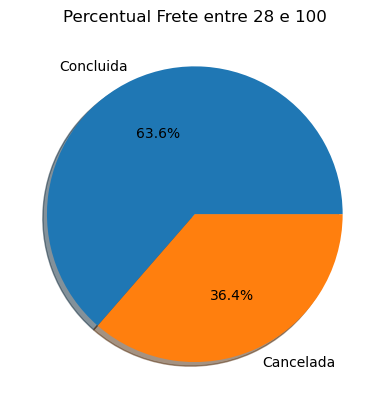

In [9]:
graficos(info_pedidos_df, 'Percentual Frete', 0, 28)
graficos(info_pedidos_df, 'Percentual Frete', 28, 100)

Situação
Concluida    309
Cancelada     79
Name: count, dtype: int64

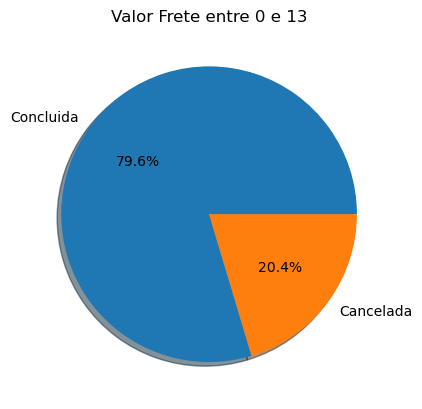

Situação
Concluida    132
Cancelada     80
Name: count, dtype: int64

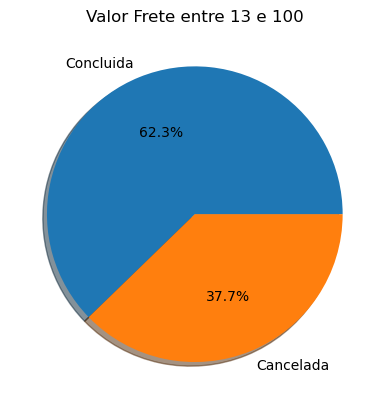

In [10]:
graficos(info_pedidos_df, 'Valor Frete', 0, 13)
graficos(info_pedidos_df, 'Valor Frete', 13, 100)